<a href="https://colab.research.google.com/github/yeb2Binfang/sklearn_learning/blob/main/decision_tree/decision_tree_regressor_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

##创造一条含有噪声的正弦曲线
在这一步，我们的基本思路就是先创建一组随机的，分布在0-5上的横坐标轴的取值(x), 然后将这一组值放到sin函数这里去生成纵坐标y的值，接着给y添加噪声

In [14]:
#让每次生成的随机数都一样
rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80,1),axis = 0)
y = np.sin(X).ravel()
#y[::5]的意思是每隔5个取一个点，对这点进行计算
y[::4] += 3 * (0.5 - rng.rand(20)) 


visualize the plot

Text(0, 0.5, 'y')

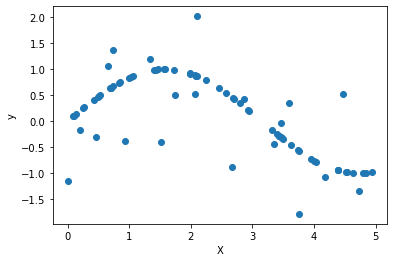

In [15]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

##train the model

In [19]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

##test the model
np.arange(start,end, step)

In [22]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis] #因为要放进回归树，不能是一维的数据，所以要增维
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print(X_test.shape)

(500, 1)


##Visualize the test data


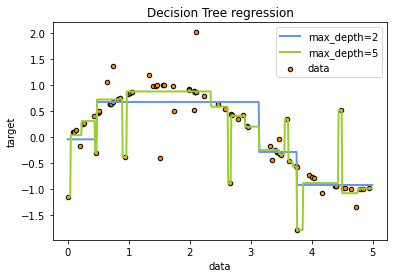

In [21]:
plt.figure()
plt.scatter(X,y,s=20,edgecolors="black", c="darkorange", label = "data")
plt.plot(X_test,y_1, color="cornflowerblue", label = "max_depth=2",linewidth = 2)
plt.plot(X_test,y_2, color = "yellowgreen", label = "max_depth=5", linewidth = 2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree regression")
plt.legend()
plt.show()

我们可以看到当max_depth=5时，会把噪声也拟合上去，这就是过拟合